## Autoencoder for dimensionality reduction

#### Data Preparation:

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [2]:
path = 'FMNIST/'
data_train = pd.read_csv(path+'train.csv').drop('Unnamed: 0',axis=1)
data_test = pd.read_csv(path+'test.csv').drop('Unnamed: 0',axis=1)

In [3]:
data_train.head()

,o_label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,coat,sandal,shirt,sneaker,bag,ankle_boot,footwear,accessories,other,label
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,1,0,0,0,0,0,1,2
3,0,0,0,0,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2


In [4]:
data_train['label'].value_counts()

2    36000
0    18000
1     6000
Name: label, dtype: int64

In [22]:
data_test

,o_label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,coat,sandal,shirt,sneaker,bag,ankle_boot,footwear,accessories,other,label
0,0,0,0,0,0,0,0,0,9,8,...,0,0,0,0,0,0,0,0,1,2
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,0,0,0,0,1,2
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,2
9997,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,1


In [6]:
X_train = data_train[[col for col in data_train.columns if 'pixel' in col]]
y_train = data_train['label']

X_test = data_test[[col for col in data_test.columns if 'pixel' in col]]
y_test = data_test['label']

Rescaling data so that each data attribute is contained in the interval $[0,1]$

In [7]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [8]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

### Autoencoder architecture

In [9]:
act = 'sigmoid'
input_img = Input(shape=(784,))
e0 = Dense(units = 300, activation = act)(input_img)
e3 = Dense(units = 50, activation = act)(e0)
encoded = Dense(units = 2,activation = act)(e3)
d2 = Dense(units = 50, activation = act)(encoded)
d5 = Dense(units = 300, activation = act)(d2)
decoded = Dense(units = 784, activation = act)(d5) 


autoencoder = Model(input_img, decoded)

encoder = Model(input_img,encoded)

autoencoder.compile(optimizer = 'Adam', loss = 'MSE', metrics = ['MSE'])

autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 50)                15050     
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 102       
_________________________________________________________________
dense_3 (Dense)              (None, 50)                150       
_________________________________________________________________
dense_4 (Dense)              (None, 300)               15300     
_________________________________________________________________
dense_5 (Dense)              (None, 784)               235984

#### Fit autoencoder

In [10]:
history = autoencoder.fit(X_train, X_train, epochs = 50, \
                          shuffle = True, validation_data = (X_test,X_test))

Epoch 1/50
1875/1875 [==============================] - 11s 5ms/step - loss: 0.0764 - MSE: 0.0764 - val_loss: 0.0563 - val_MSE: 0.0563
Epoch 2/50
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0459 - MSE: 0.0459 - val_loss: 0.0365 - val_MSE: 0.0365
Epoch 3/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0357 - MSE: 0.0357 - val_loss: 0.0335 - val_MSE: 0.0335
Epoch 4/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0330 - MSE: 0.0330 - val_loss: 0.0321 - val_MSE: 0.0321
Epoch 5/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0316 - MSE: 0.0316 - val_loss: 0.0309 - val_MSE: 0.0309
Epoch 6/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0306 - MSE: 0.0306 - val_loss: 0.0299 - val_MSE: 0.0299
Epoch 7/50
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0296 - MSE: 0.0296 - val_loss: 0.0292 - val_MSE: 0.0292
Epoch 8/50
1875/1875 [==============================] - 9s 5

### Verifying there is no overfitting

dict_keys(['loss', 'MSE', 'val_loss', 'val_MSE'])


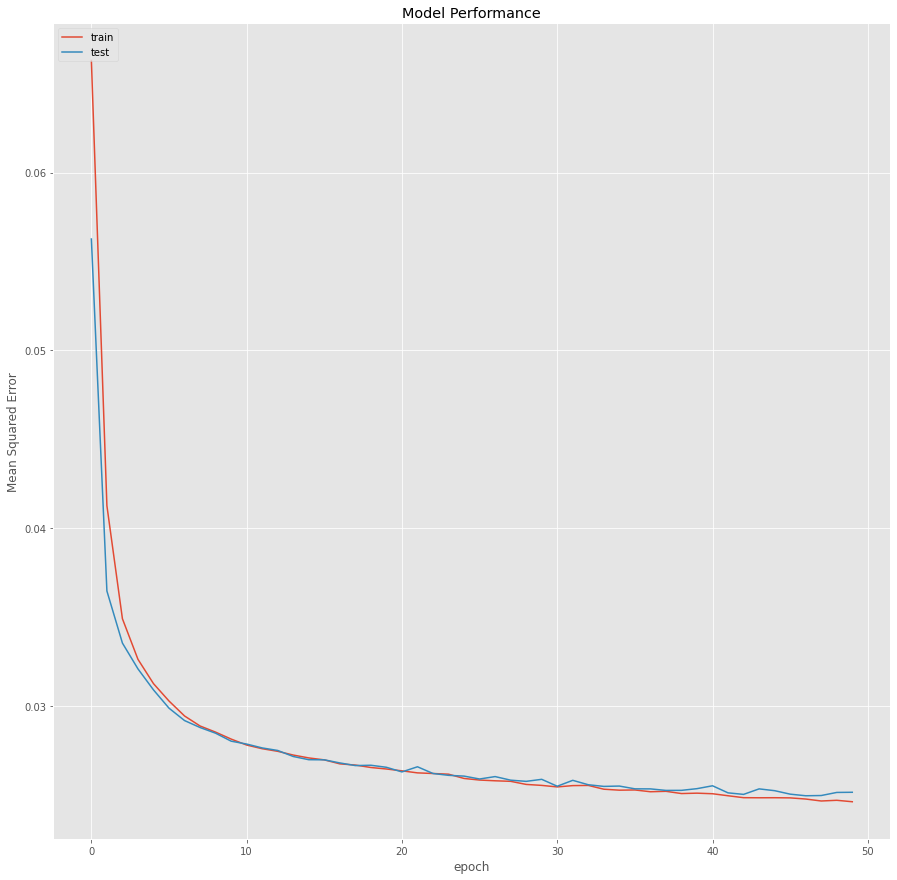

In [11]:
print(history.history.keys())
plt.figure(figsize=(15,15))
plt.plot(history.history['MSE'])
plt.plot(history.history['val_MSE'])
plt.title('Model Performance')
plt.ylabel('Mean Squared Error')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.savefig(path+'model_performance.png', dpi = 300)
plt.show()

In [12]:
labels_dict = {0:'t-shirt',1:'trouser',2:'pullover',3:'dress',4:'coat',5:'sandal',6:'shirt',\
         7:'sneaker',8:'bag',9:'ankle_boot'}

In [13]:
sample_data = pd.concat([pd.DataFrame(X_test), data_test['o_label']], axis = 1)
sample_images = []
labels = list(sample_data['o_label'].unique())
labels.sort()
for label in labels:
    image = sample_data[sample_data['o_label'] == label].sample(1, random_state = 1), label
    sample_images.append(image)

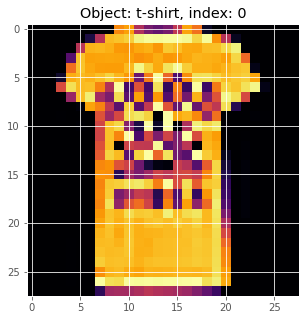

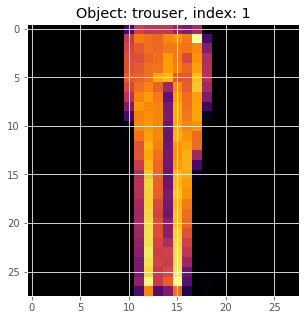

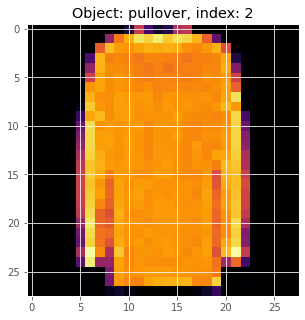

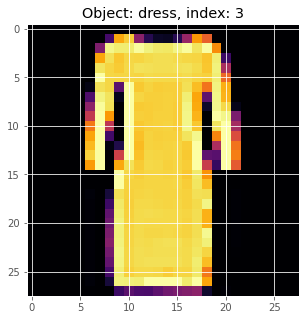

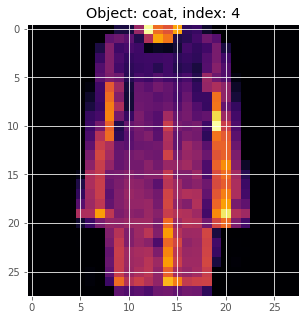

In [14]:
for i,image in enumerate(sample_images[:5]):
    x = image[0].drop('o_label',axis=1)
    plt.figure(figsize=(5,5))
    idx = list(image[0].o_label.values).pop()
    object_label = labels_dict[idx]
    plt.title('Object: ' + object_label + ', ' + 'index: ' + str(idx))
    plt.imshow(x.to_numpy().reshape(28,28), cmap = 'inferno')
    plt.savefig(path+'sample_images/' + object_label + '.png', dpi=300)

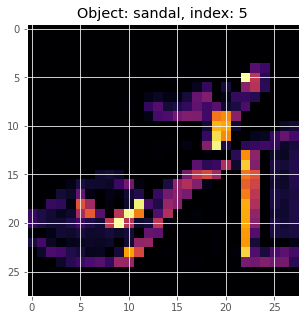

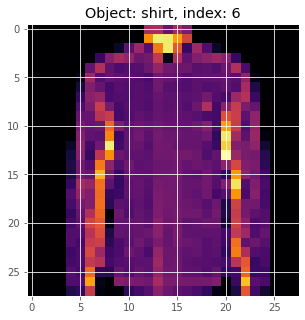

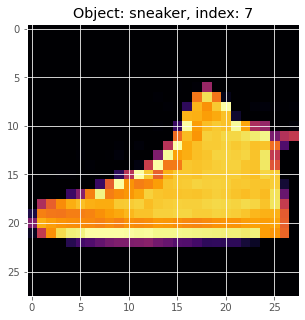

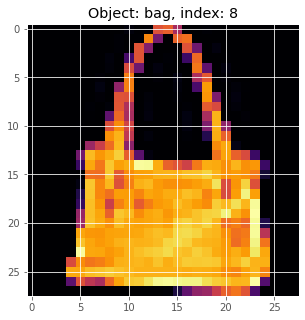

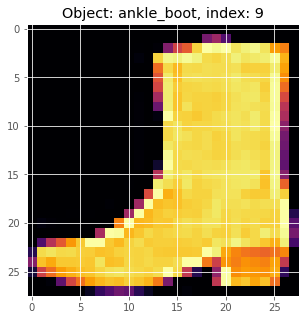

In [15]:
for i,image in enumerate(sample_images[5:]):
    x = image[0].drop('o_label',axis=1)
    plt.figure(figsize=(5,5))
    idx = list(image[0].o_label.values).pop()
    object_label = labels_dict[idx]
    plt.title('Object: ' + object_label + ', ' + 'index: ' + str(idx))
    plt.imshow(x.to_numpy().reshape(28,28), cmap = 'inferno')
    plt.savefig(path+'sample_images/' + object_label + '.png', dpi=300)

### Using the encoder to project onto a lower-dimensional space

In [16]:
proyection_test = encoder.predict(X_test)

In [17]:
P1,P2 = proyection_test[:,0],proyection_test[:,1] 

In [18]:
mapper_input_full = pd.concat((pd.Series(P1, name = 'P1'), pd.Series(P2, name = 'P2'), \
pd.Series(y_test,name='label'), X_test), axis=1)

In [19]:
mapper_input_full

,P1,P2,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.433886,0.051793,2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.403922,0.341176,0.219608,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
1,0.863988,0.197756,2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.133333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
2,0.271203,0.288824,2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.054902,...,0.000000,0.000000,0.000000,0.000000,0.247059,0.207843,0.121569,0.000000,0.000000,0.0
3,0.176868,0.275109,2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.537255,0.494118,0.549020,0.000000,0.521569,0.878431,0.870588,0.219608,0.000000,0.0
4,0.711356,0.042197,2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0.377941,0.185942,2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.125490,0.090196,0.054902,0.078431,0.000000,0.000000,0.003922,0.000000,0.000000,0.0
9996,0.284127,0.285309,2,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.007843,0.203922,0.090196,0.109804,0.000000,0.000000,0.0
9997,0.158437,0.454532,1,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.686275,0.674510,0.674510,0.713726,0.780392,0.870588,0.164706,0.000000,0.003922,0.0
9998,0.039748,0.375503,1,0.0,0.003922,0.011765,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.003922,0.000000,0.000000,0.000000,0.0


### Visualizing the projection

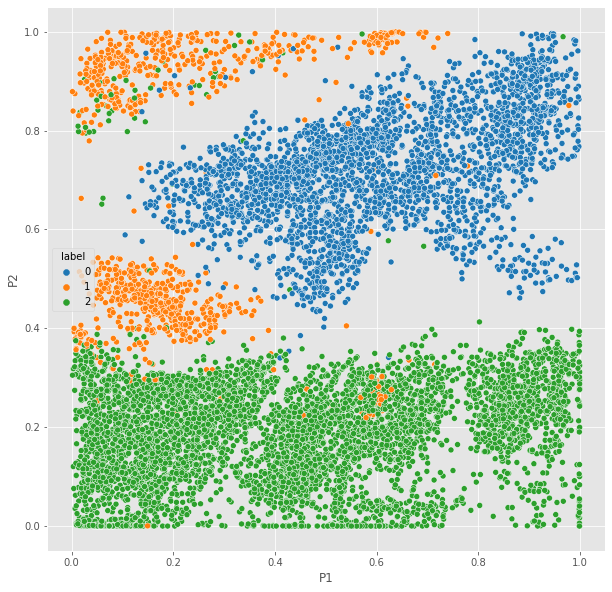

In [20]:
plt.figure(figsize=(10,10))
sns.scatterplot(x=mapper_input_full['P1'],\
                y=mapper_input_full['P2'], hue=data_test['label'], palette='tab10')
plt.savefig(path+'FMNIST_Encoder.png',dpi=300)

In [21]:
#Save the final dataset that will be used as a mapper filter function.
mapper_input_full.to_csv(path+'mapper_input_full.csv')